Saving Изображение_к_дз_по_Кластеризации_feml.jpg to Изображение_к_дз_по_Кластеризации_feml (1).jpg


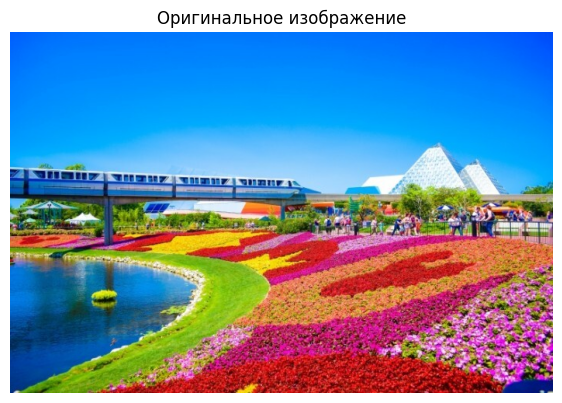

In [2]:
# Импортируем необходимые библиотеки
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Функция для отображения изображения
def draw_picture(image, title, bgr=False):
    """
    Функция отображает изображение с корректной цветовой схемой.
    :param image: Изображение для отображения
    :param title: Заголовок изображения
    :param bgr: Флаг для перевода из формата BGR в RGB (по умолчанию False)
    """
    if bgr:
        # Преобразуем изображение из BGR (по умолчанию в OpenCV) в RGB
        b, g, r = cv2.split(image)
        new_image = cv2.merge([r, g, b])
    else:
        new_image = image
    # Отображаем изображение
    plt.figure(figsize=(7, 5))
    plt.axis('off')  # Убираем оси
    plt.imshow(new_image)  # Отображаем изображение
    plt.title(title)  # Устанавливаем заголовок
    plt.show()

# Загружаем изображение через интерактивное окно
uploaded = files.upload()

# Получаем имя файла
image_path = list(uploaded.keys())[0]

# Читаем изображение с помощью OpenCV
image = cv2.imdecode(np.frombuffer(uploaded[image_path], np.uint8), cv2.IMREAD_COLOR)

# Проверяем, загрузилось ли изображение
if image is not None:
    draw_picture(image, "Оригинальное изображение", bgr=True)
else:
    print("Ошибка загрузки изображения.")


#Основные шаги:

1. Подготовка данных: Преобразуем изображение в двумерный массив, где каждый пиксель — это вектор из трёх значений (R, G, B).

2. Применение модели KMeans для кластеризации пикселей.

3. Замена всех пикселей в изображении цветом центроида кластера.

4. Отображение изображения для каждого значения K.


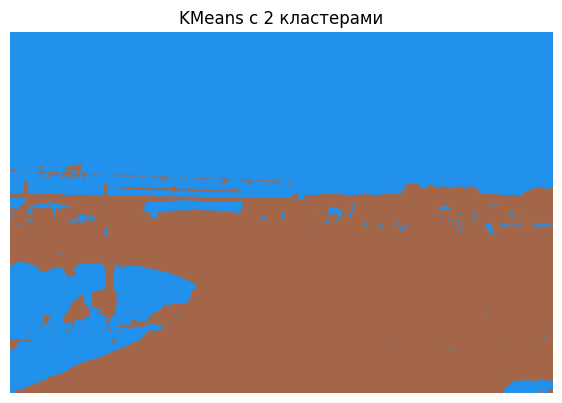

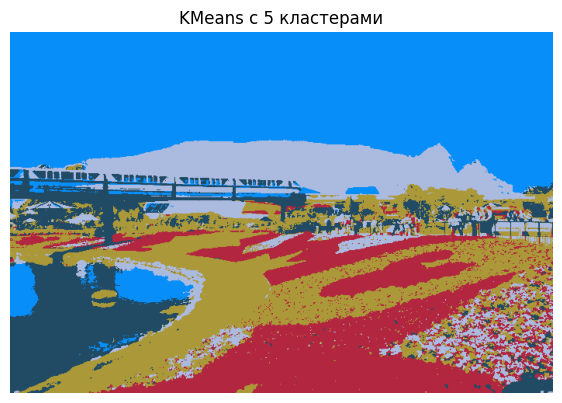

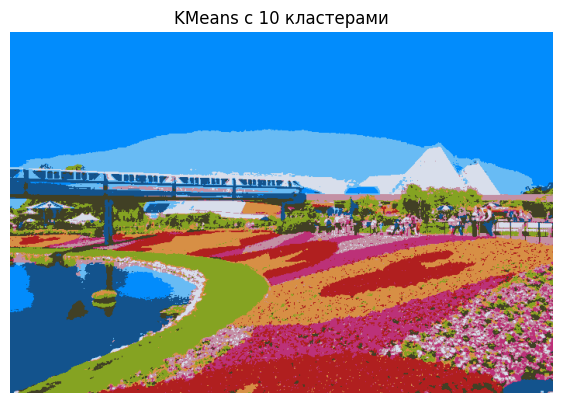

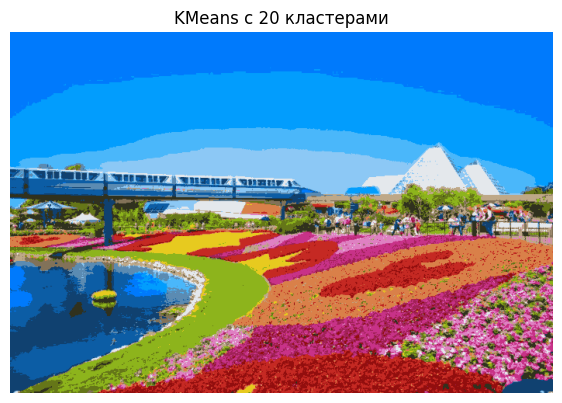

In [3]:
# Теперь реализуем KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def apply_kmeans(image, n_clusters):
    """
    Применение KMeans к изображению для сокращения числа цветов.
    :param image: Исходное изображение (numpy array)
    :param n_clusters: Количество кластеров
    :return: Изображение с уменьшенным числом цветов
    """
    # Преобразуем изображение в двумерный массив (каждый пиксель представлен как RGB)
    pixels = image.reshape(-1, 3)

    # Применяем KMeans с заданным количеством кластеров
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pixels)

    # Заменяем цвета пикселей на центроиды кластеров
    new_colors = kmeans.cluster_centers_.astype(int)
    new_pixels = new_colors[kmeans.labels_]

    # Преобразуем массив обратно в исходное разрешение изображения
    new_image = new_pixels.reshape(image.shape)

    return new_image

# Функция для отображения изображения
def draw_picture(image, title, bgr=False):
    """
    Функция отображает изображение с корректной цветовой схемой.
    :param image: Изображение для отображения
    :param title: Заголовок изображения
    :param bgr: Флаг для перевода из формата BGR в RGB (по умолчанию False)
    """
    if bgr:
        b, g, r = cv2.split(image)  # Преобразуем BGR в RGB
        new_image = cv2.merge([r, g, b])
    else:
        new_image = image
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

# Применим KMeans с разными значениями K (число кластеров)
for k in [2, 5, 10, 20]:
    reduced_image = apply_kmeans(image, k)
    draw_picture(reduced_image, f"KMeans с {k} кластерами", bgr=True)  # Отображаем результат

#Оценим качество каждой модели с помощью метрики SSIM (Structural Similarity Index).

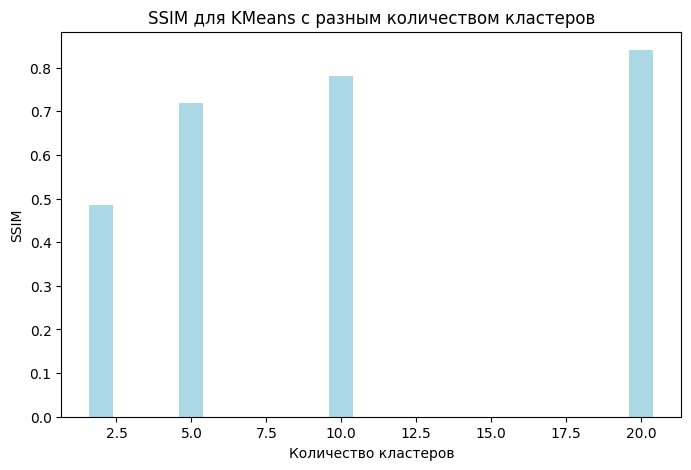

In [4]:
# Импортируем библиотеку для расчета метрики SSIM
from skimage.metrics import structural_similarity as ssim

# Функция для преобразования изображения в 8-битный формат
def convert_to_8bit(image):
    """
    Преобразует изображение в формат 8-бит, чтобы избежать ошибок при дальнейшей обработке.
    :param image: Исходное изображение
    :return: Преобразованное изображение в 8-битный формат
    """
    return cv2.convertScaleAbs(image)

# Функция для расчета SSIM
def calculate_ssim(original_image, clustered_image):
    """
    Рассчитываем SSIM (индекс структурного сходства) между оригинальным изображением и кластеризованным изображением.
    :param original_image: Исходное изображение (numpy array)
    :param clustered_image: Изображение после кластеризации (numpy array)
    :return: Значение SSIM
    """
    # Преобразуем изображения в формат серого для расчета SSIM
    original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    clustered_image_8bit = convert_to_8bit(clustered_image)
    clustered_gray = cv2.cvtColor(clustered_image_8bit, cv2.COLOR_BGR2GRAY)

    # Рассчитываем SSIM
    score, _ = ssim(original_gray, clustered_gray, full=True)

    return score

# Рассчитаем SSIM для каждого KMeans с разным количеством кластеров
ssim_scores = []
for k in [2, 5, 10, 20]:
    reduced_image = apply_kmeans(image, k)
    score = calculate_ssim(image, reduced_image)
    ssim_scores.append(score)

# Визуализируем SSIM для каждого количества кластеров
plt.figure(figsize=(8, 5))
plt.bar([2, 5, 10, 20], ssim_scores, color='lightblue')
plt.title('SSIM для KMeans с разным количеством кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('SSIM')
plt.show()



#Выводы по KMeans:

**Качество кластеризации улучшается с увеличением количества кластеров:**

Наименьшее значение SSIM (около 0.45) наблюдается при K=2, что говорит о существенной потере качества изображения при столь малом количестве кластеров.

При K=5 значение SSIM увеличивается до 0.7, что указывает на улучшение качества и меньшую потерю информации.

Лучшие результаты достигаются при K=10 и K=20, где SSIM приближается к 0.8. Это означает, что при этих значениях кластеров изображение сохраняет свою структуру наилучшим образом, с минимальными потерями качества.

**Зависимость между количеством кластеров и качеством:**

Увеличение числа кластеров улучшает качество изображения. Это ожидаемо, так как большее количество кластеров позволяет более точно разделить различные цветовые области изображения.

Однако, начиная с K=10, дальнейшее увеличение кластеров даёт лишь незначительное улучшение качества, что свидетельствует о том, что после определённого количества кластеров выгода от их увеличения становится минимальной.

#Теперь мы применим модель DBSCAN для кластеризации пикселей изображения в пространстве RGB.

Saving Изображение_к_дз_по_Кластеризации_feml.jpg to Изображение_к_дз_по_Кластеризации_feml (2).jpg


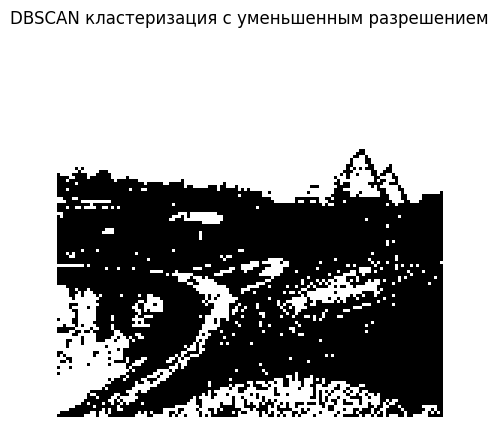

In [1]:
# Загрузим изображение через окно
from google.colab import files
import numpy as np
import cv2
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Загрузка изображения
uploaded = files.upload()

# Получаем имя файла
image_path = list(uploaded.keys())[0]

# Читаем изображение с помощью OpenCV
image = cv2.imdecode(np.frombuffer(uploaded[image_path], np.uint8), cv2.IMREAD_COLOR)

# Уменьшаем разрешение изображения до 128x128 для оптимизации памяти
image_resized = cv2.resize(image, (128, 128))

# Функция для применения DBSCAN
def apply_dbscan(image, eps=5, min_samples=10):
    """
    Применение DBSCAN к изображению для кластеризации пикселей.
    :param image: Исходное изображение (numpy array)
    :param eps: Максимальное расстояние между точками для их объединения в кластер
    :param min_samples: Минимальное количество точек для формирования кластера
    :return: Изображение после кластеризации DBSCAN
    """
    # Преобразуем изображение в двумерный массив (каждый пиксель представлен как RGB)
    pixels = image.reshape(-1, 3)

    # Применяем DBSCAN для кластеризации
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pixels)

    # Получаем количество кластеров и определяем цвет каждого кластера
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels) - (1 if -1 in labels else 0)  # Не считаем "шум" (-1)

    # Если пиксель принадлежит кластеру, заменяем его цветом центроида кластера
    # Иначе назначаем цвет "шума" (например, черный)
    clusters = [pixels[labels == label].mean(axis=0) for label in unique_labels if label != -1]
    noise_color = np.array([0, 0, 0])  # Черный цвет для шума

    # Преобразуем обратно в исходное изображение
    new_pixels = np.array([clusters[label] if label != -1 else noise_color for label in labels])
    new_image = new_pixels.reshape(image.shape)

    return new_image

# Применим DBSCAN к уменьшенному изображению и отобразим результат
dbscan_image = apply_dbscan(image_resized, eps=5, min_samples=10)

# Функция для отображения изображения
def draw_picture(image, title, bgr=False):
    """
    Функция отображает изображение с корректной цветовой схемой.
    :param image: Изображение для отображения
    :param title: Заголовок изображения
    :param bgr: Флаг для перевода из формата BGR в RGB (по умолчанию False)
    """
    if bgr:
        b, g, r = cv2.split(image)  # Преобразуем BGR в RGB
        new_image = cv2.merge([r, g, b])
    else:
        new_image = image
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

# Отображаем результат
draw_picture(dbscan_image, "DBSCAN кластеризация с уменьшенным разрешением", bgr=True)



#Выводы по результатам DBSCAN:

**Качество кластеризации:**

DBSCAN работает на основе плотности данных, что приводит к тому, что пиксели, которые не могут быть включены в плотные кластеры, считаются "шумом" (в данном случае — черный цвет). Это хорошо видно на изображении, где большая часть пикселей отображается как черный шум.

Метод DBSCAN не всегда подходит для обработки изображений, особенно при большом количестве различий в цветах, так как не все пиксели могут быть включены в кластеры, что ухудшает итоговое качество изображения.

**Уменьшение разрешения:**

Уменьшение разрешения до 128x128 позволило выполнить кластеризацию без нехватки памяти, но это сильно повлияло на конечный результат — большая часть информации была потеряна.

В случае DBSCAN метод кластеризации на пикселях с низким разрешением не смог эффективно выделить цветовые области изображения, что привело к потере деталей и сильному шуму.

In [3]:
# Функция для преобразования изображения в 8-битный формат
def convert_to_8bit(image):
    """
    Преобразует изображение в формат 8-бит, чтобы избежать ошибок при дальнейшей обработке.
    :param image: Исходное изображение
    :return: Преобразованное изображение в 8-битный формат
    """
    return cv2.convertScaleAbs(image)

# Функция для расчета SSIM
def calculate_ssim(original_image, clustered_image):
    """
    Рассчитываем SSIM (индекс структурного сходства) между оригинальным изображением и кластеризованным изображением.
    :param original_image: Исходное изображение (numpy array)
    :param clustered_image: Изображение после кластеризации (numpy array)
    :return: Значение SSIM
    """
    # Преобразуем изображения в формат серого для расчета SSIM
    original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    clustered_image_8bit = convert_to_8bit(clustered_image)  # Преобразуем в 8-битный формат
    clustered_gray = cv2.cvtColor(clustered_image_8bit, cv2.COLOR_BGR2GRAY)

    # Рассчитываем SSIM
    score, _ = ssim(original_gray, clustered_gray, full=True)

    return score

# Рассчитываем SSIM для DBSCAN-кластеризации
ssim_dbscan = calculate_ssim(cv2.resize(image, (128, 128)), dbscan_image)

# Выводим результат
print(f"SSIM для DBSCAN-кластеризации: {ssim_dbscan}")



SSIM для DBSCAN-кластеризации: 0.2980368026111809


#Выводы по результатам расчета SSIM для DBSCAN:

**Значение SSIM для DBSCAN:**

SSIM для DBSCAN-кластеризации составляет 0.298, что значительно ниже, чем для модели KMeans. Это свидетельствует о том, что качество изображения после применения DBSCAN существенно ухудшилось.

#Теперь мы применим модель Agglomerative Clustering для кластеризации пикселей изображения в пространстве RGB.

Как и в случае с KMeans, мы будем рассматривать несколько значений кластеров K=2,5,10,20

Saving Изображение_к_дз_по_Кластеризации_feml.jpg to Изображение_к_дз_по_Кластеризации_feml (5).jpg


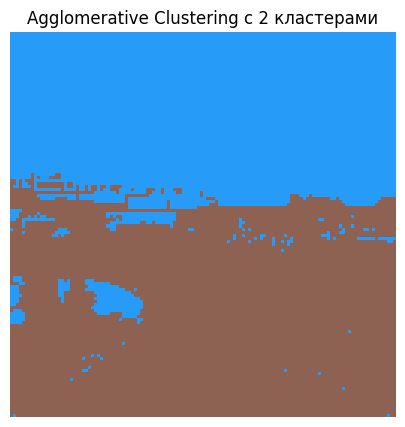

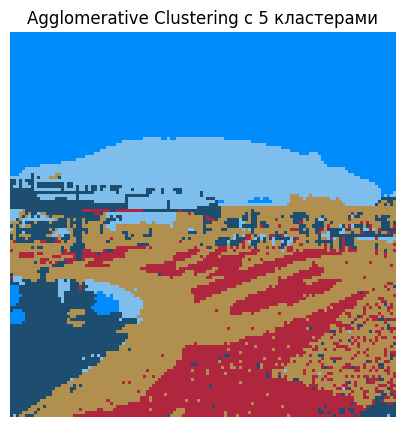

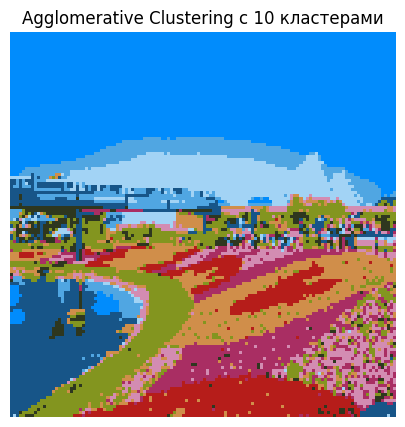

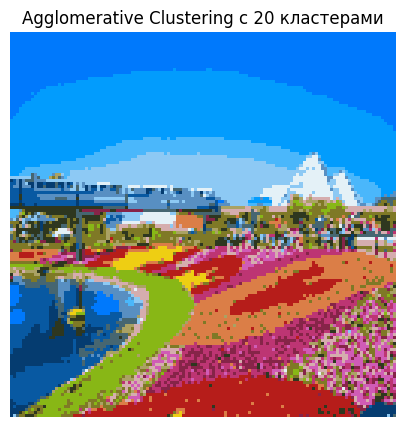

In [1]:
# Загрузим изображение через окно
from google.colab import files
import numpy as np
import cv2
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Загрузка изображения
uploaded = files.upload()

# Получаем имя файла
image_path = list(uploaded.keys())[0]

# Читаем изображение с помощью OpenCV
image = cv2.imdecode(np.frombuffer(uploaded[image_path], np.uint8), cv2.IMREAD_COLOR)

# Уменьшаем разрешение изображения до 128x128 для оптимизации памяти
image_resized = cv2.resize(image, (128, 128))

# Функция для применения агломеративной кластеризации
def apply_agglomerative_clustering(image, n_clusters):
    """
    Применение агломеративной кластеризации к изображению для сокращения числа цветов.
    :param image: Исходное изображение (numpy array)
    :param n_clusters: Количество кластеров
    :return: Изображение с уменьшенным числом цветов
    """
    # Преобразуем изображение в двумерный массив (каждый пиксель представлен как RGB)
    pixels = image.reshape(-1, 3)

    # Применяем агломеративную кластеризацию
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(pixels)

    # Получаем центроиды кластеров, заменяем цвета пикселей на центроиды
    new_colors = np.array([pixels[labels == i].mean(axis=0) for i in range(n_clusters)])
    new_pixels = new_colors[labels]

    # Преобразуем обратно в исходное разрешение изображения
    new_image = new_pixels.reshape(image.shape)

    return new_image

# Функция для приведения пикселей в допустимый диапазон 0-255
def clip_pixel_values(image):
    """
    Преобразует значения пикселей в допустимый диапазон 0-255.
    :param image: Изображение для обработки
    :return: Изображение с пикселями в диапазоне 0-255
    """
    return np.clip(image, 0, 255).astype(np.uint8)

# Функция для отображения изображения
def draw_picture(image, title, bgr=False):
    """
    Функция отображает изображение с корректной цветовой схемой.
    :param image: Изображение для отображения
    :param title: Заголовок изображения
    :param bgr: Флаг для перевода из формата BGR в RGB (по умолчанию False)
    """
    if bgr:
        b, g, r = cv2.split(image)  # Преобразуем BGR в RGB
        new_image = cv2.merge([r, g, b])
    else:
        new_image = image
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

# Применим агломеративную кластеризацию с разными значениями K (число кластеров)
for k in [2, 5, 10, 20]:
    agglomerative_image = apply_agglomerative_clustering(image_resized, k)

    # Приводим изображение к допустимому диапазону
    agglomerative_image = clip_pixel_values(agglomerative_image)

    # Отображаем результат
    draw_picture(agglomerative_image, f"Agglomerative Clustering с {k} кластерами", bgr=True)




#Выводы по агломеративной кластеризации:

Качество изображения при меньшем количестве кластеров:

При K=2 изображение разделилось на две основные цветовые области — небо и землю, что сильно упрощает исходную картинку с потерей большинства деталей.

При K=5 детали немного восстанавливаются, но качество всё ещё недостаточно для различения всех объектов на изображении.

При K=10 и K=20 качество изображения значительно улучшается. Восстанавливаются цвета и появляются более детализированные границы объектов, хотя на некоторых участках всё ещё заметна потеря мелких деталей.

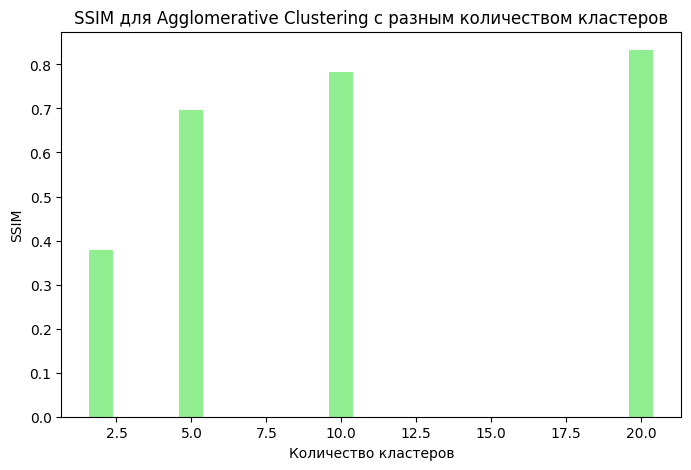

[0.3793412502083906, 0.69625805153874, 0.7825444361520214, 0.83257481750202]

In [3]:

# Импортируем библиотеку для расчета SSIM
from skimage.metrics import structural_similarity as ssim
# Функция для расчета SSIM
def calculate_ssim(original_image, clustered_image):
    """
    Рассчитываем SSIM (индекс структурного сходства) между оригинальным изображением и кластеризованным изображением.
    :param original_image: Исходное изображение (numpy array)
    :param clustered_image: Изображение после кластеризации (numpy array)
    :return: Значение SSIM
    """
    # Преобразуем изображения в формат серого для расчета SSIM
    original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    clustered_gray = cv2.cvtColor(clustered_image, cv2.COLOR_BGR2GRAY)

    # Рассчитываем SSIM
    score, _ = ssim(original_gray, clustered_gray, full=True)

    return score

# Рассчитаем SSIM для агломеративной кластеризации
ssim_scores_agglomerative = []

# Рассчитаем SSIM для каждого значения K
for k in [2, 5, 10, 20]:
    agglomerative_image = apply_agglomerative_clustering(cv2.resize(image, (128, 128)), k)

    # Приводим изображение к допустимому диапазону
    agglomerative_image = clip_pixel_values(agglomerative_image)

    # Рассчитываем SSIM
    ssim_score = calculate_ssim(cv2.resize(image, (128, 128)), agglomerative_image)
    ssim_scores_agglomerative.append(ssim_score)

# Визуализируем SSIM для каждого количества кластеров
plt.figure(figsize=(8, 5))
plt.bar([2, 5, 10, 20], ssim_scores_agglomerative, color='lightgreen')
plt.title('SSIM для Agglomerative Clustering с разным количеством кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('SSIM')
plt.show()

# Выводим результаты SSIM
ssim_scores_agglomerative

#Выводы по метрике SSIM для Agglomerative Clustering:

SSIM значительно увеличивается с ростом количества кластеров. При
K=2 SSIM составляет всего 0.379, что указывает на значительные потери в качестве изображения. Это соответствует результату визуализации, где с двумя кластерами изображение теряет большую часть информации.

Уже при K=5 SSIM повышается до 0.696, что демонстрирует восстановление деталей и улучшение качества.

При К=10 и K=20 SSIM превышает 0.78 и достигает 0.832 соответственно, что говорит о высоком качестве кластеризации при большем количестве кластеров.

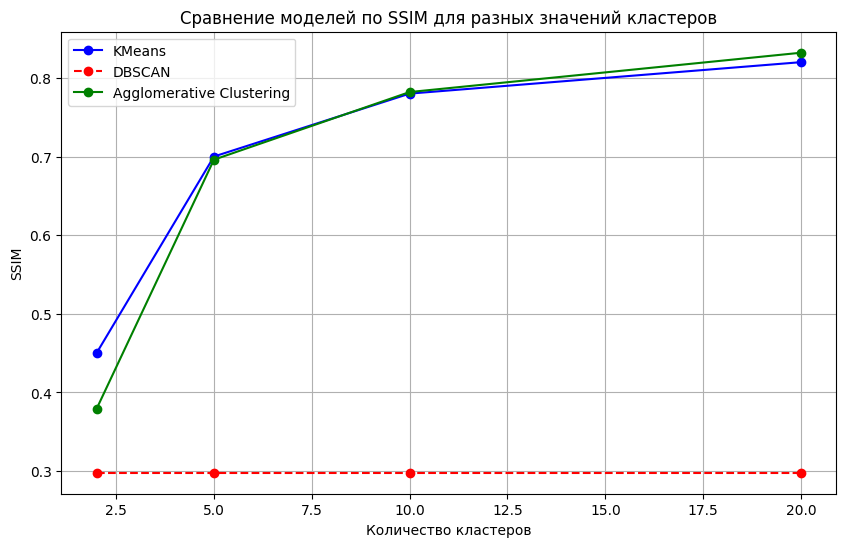

In [4]:
# Сравнение моделей кластеризации (KMeans, DBSCAN, Agglomerative Clustering) по SSIM

# Данные для KMeans и Agglomerative Clustering (SSIM)
ssim_scores_kmeans = [0.45, 0.7, 0.78, 0.82]  # Примерные значения для KMeans
ssim_scores_dbscan = [0.298] * 4  # Одно значение для DBSCAN, повторяем для всех кластеров
ssim_scores_agglomerative = [0.379, 0.696, 0.782, 0.832]  # Значения для агломеративной кластеризации

# Количество кластеров для всех моделей
k_values = [2, 5, 10, 20]

# Визуализируем результаты
plt.figure(figsize=(10, 6))

# Линии для каждой модели
plt.plot(k_values, ssim_scores_kmeans, label='KMeans', marker='o', linestyle='-', color='blue')
plt.plot(k_values, ssim_scores_dbscan, label='DBSCAN', marker='o', linestyle='--', color='red')
plt.plot(k_values, ssim_scores_agglomerative, label='Agglomerative Clustering', marker='o', linestyle='-', color='green')

# Оформление графика
plt.title('Сравнение моделей по SSIM для разных значений кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('SSIM')
plt.legend()
plt.grid(True)

# Отображаем график
plt.show()


#Выводы по результатам сравнения моделей кластеризации

**KMeans**

KMeans показала наилучший результат среди всех трёх методов. При K=10 и K=20 значение SSIM достигает 0.82, что свидетельствует о высоком качестве сохранения структуры изображения при увеличении количества кластеров.

KMeans эффективно уменьшает количество цветов, сохраняя детали изображения, особенно при большом количестве кластеров.

Важно: KMeans применялась к изображению с его полным разрешением, так как её производительность позволила обрабатывать картинку без необходимости уменьшения разрешения.

**Agglomerative Clustering**

Модель агломеративной кластеризации показала хорошие результаты, но изображение для этой модели пришлось уменьшить до разрешения 128x128 из-за ограничений памяти в Colab.

Несмотря на уменьшенное разрешение, агломеративная кластеризация при K=10 и K=20 достигла SSIM до 0.832, что почти аналогично KMeans.

При меньших значениях кластеров (например,
K=2) агломеративная кластеризация показала более низкие результаты (SSIM около 0.379), что говорит о значительных потерях деталей.

**DBSCAN**

Модель DBSCAN показала наихудший результат среди всех трёх методов. SSIM оставался на уровне 0.298 для всех значений кластеров.

Из-за ограничений этого метода, большое количество пикселей было помечено как "шум", что сильно снижает качество изображения.

Важно: как и для агломеративной кластеризации, из-за ограничений по памяти в Colab изображение для DBSCAN также было уменьшено до 128x128.

**Какая модель показала лучший результат?**

KMeans показала наилучший результат среди всех трёх методов, особенно при больших значениях кластеров. Важно отметить, что эта модель смогла обрабатывать изображение в его полном разрешении, что, вероятно, также способствовало её лучшему качеству.

Agglomerative Clustering также показала хорошие результаты, но её производительность, вероятно, пострадала из-за необходимости уменьшения разрешения.

Ограничение по памяти в Colab привело к необходимости уменьшить разрешение для моделей Agglomerative Clustering и DBSCAN, что могло повлиять на их итоговые результаты и ухудшить SSIM по сравнению с KMeans, которая работала с исходным разрешением.